In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
df=pd.read_csv('hp_data.csv')
df.head()

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [ ]:
df.shape

(3500, 10)

In [ ]:
label_encoder = LabelEncoder()
df["place"] = label_encoder.fit_transform(df["place"])
encoder = OneHotEncoder(sparse=False, drop='first')
df["place"] = encoder.fit_transform(df[["place"]])

/home/me3-lab/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,0.0,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,0.0,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,0.0,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,1.0,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,0.0,Super built-up Area,2190,Resale,5,3,5,3


In [ ]:
df.drop(columns=['Unnamed: 0','built','sale'],inplace=True)

In [ ]:
df.head()

,price,place,sqft,yearsOld,floor,totalFloor,bhk
0,6300000,0.0,1450,5,1,4,1
1,11500000,0.0,2190,5,3,5,3
2,3800000,0.0,1019,1,2,5,2
3,10500000,1.0,1857,15,4,5,4
4,11500000,0.0,2190,5,3,5,3


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=3)

In [ ]:
x_train.shape,x_test.shape

((2625, 6), (875, 6))

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

-10842452.827111583

In [ ]:
model.coef_

array([2055750.37313922,    8474.52385186,   41148.94659672,
       -890113.96876795, 2010637.84245318, -890113.96876793])

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_predict

array([ 4326969.26172193, 13163451.31847771,  6000788.69336132,
        1387135.70012022,  4326969.26172193,  7913674.92334203,
       10500000.00000001,  4326969.26172193,  7102476.79410278,
        4326969.26172193, 10500000.00000001,  6000788.69336132,
        7102476.79410278,  7913674.92334203,  4326969.26172193,
        4326969.26172193,  8629220.74609707, 10500000.00000001,
       10500000.00000001,  7102476.79410278,  1387135.70012022,
       13163451.31847771, 13163451.31847771,  7913674.92334203,
       12635004.54109791,  7913674.92334203, 12635004.54109791,
        5347094.49947664,  6000788.69336132,  5347094.49947664,
       13163451.31847771,  6000788.69336132,  7102476.79410278,
       12635004.54109791,  6000788.69336132, 13163451.31847771,
        1387135.70012022, 12635004.54109791,  7102476.79410278,
        5347094.49947664, 12635004.54109791, 12635004.54109791,
        7102476.79410278,  7913674.92334203,  5347094.49947664,
        6000788.69336132,  1387135.70012

In [ ]:
x=df.iloc[:,1:]
y=model.coef_*x+model.intercept_

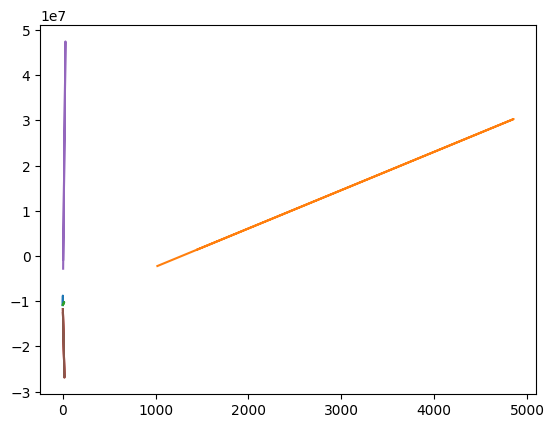

In [ ]:
plt.plot(x,y)

In [ ]:
r2_score(y_test,y_predict)

0.8668499140442857

In [ ]:
mean_absolute_error(y_test,y_predict)

1322766.2469953864

In [ ]:
import math
math.sqrt(mean_squared_error(y_test,y_predict))

1904682.665702755